# Descriptive Analysis of the data

In [1]:
# load setup.py file
%run setup.py
pd.set_option('display.max_rows', 10)

df_invited = pd.read_csv('factInvited.csv')
df_proceedings = pd.read_csv('factProceedings.csv')
df = df_invited.append(df_proceedings, ignore_index=True)

In [105]:
pd.set_option('display.max_rows', 15)

In [2]:
df_invited.groupby(['Year','Conference (short)'])['Conference (short)'].count().mean()

4.520689655172414

In [15]:
print("Number of rows in factInvited.csv: ", df_invited.shape[0])
print("Number of rows in factProceedings.csv: ", df_proceedings.shape[0])

Number of rows in factInvited.csv:  1311
Number of rows in factProceedings.csv:  194638


In [5]:
df_proceedings['gender'].value_counts(normalize=True)['F']

0.20898796740615913

In [16]:
print("female ratio for invited",df_invited['gender'].value_counts(normalize=True)['F'])
print("female ratio for proceedings",df_proceedings['gender'].value_counts(normalize=True)['F'])

female ratio for invited 0.23053435114503817
female ratio for proceedings 0.20898796740615913


### Bar Chart Count of Speakers per Conference/Field

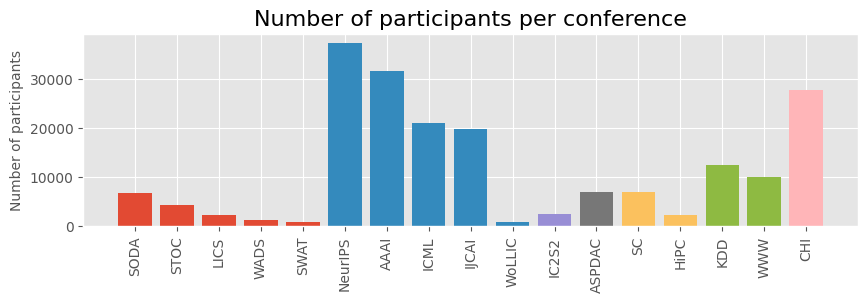

In [26]:
grouped = df_proceedings.groupby(['Main Topic', 'Conference (short)']).count()['Full name'].reset_index(name = "count" ).sort_values(by=['Main Topic','count'], ascending=[True,False])

unique_topics = sorted(df['Main Topic'].unique())
# Create a list of colors corresponding to each unique value in the 'Main Topic' column
# colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(unique_topics)))
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6']

plt.style.use('ggplot')
plt.figure(figsize=(10, 2.5))
for i, topic in enumerate(unique_topics):

    subset = grouped[grouped['Main Topic'] == topic]
    plt.bar(subset['Conference (short)'], subset['count'], color=colors[i], label=topic)

plt.xticks(rotation=90)
plt.ylabel('Number of participants', fontsize=10)
plt.title('Number of participants per conference', fontsize=16)


# Move the legend outside the plot box
# plt.legend(loc='lower center',bbox_to_anchor=(0.5, -1))


plt.show()

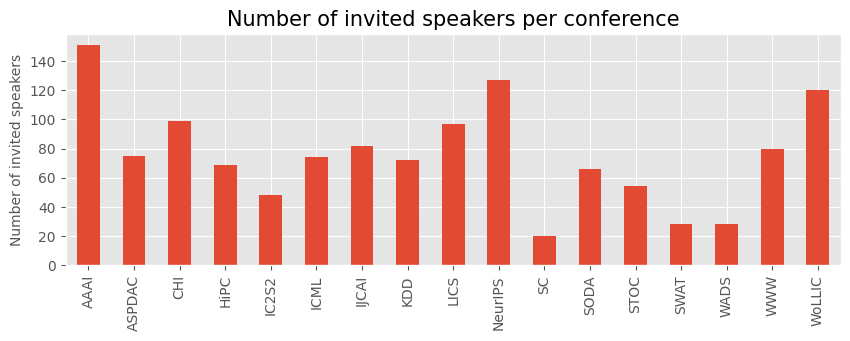

In [6]:
df_invited['Conference (short)'].value_counts().sort_index().plot(kind='bar',figsize=(10,3))
plt.ylabel('Number of invited speakers', fontsize=10)
plt.title('Number of invited speakers per conference', fontsize=15)
plt.show()

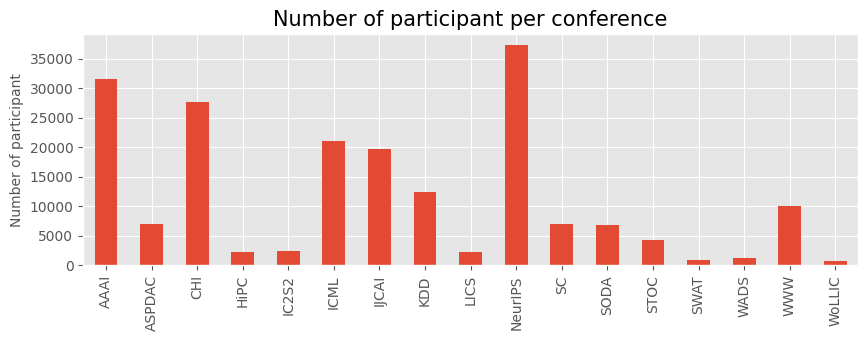

In [7]:
df_proceedings['Conference (short)'].value_counts().sort_index().plot(kind='bar',figsize=(10,3),color='o)
plt.ylabel('Number of participant', fontsize=10)
plt.title('Number of participant per conference', fontsize=15)
plt.show()

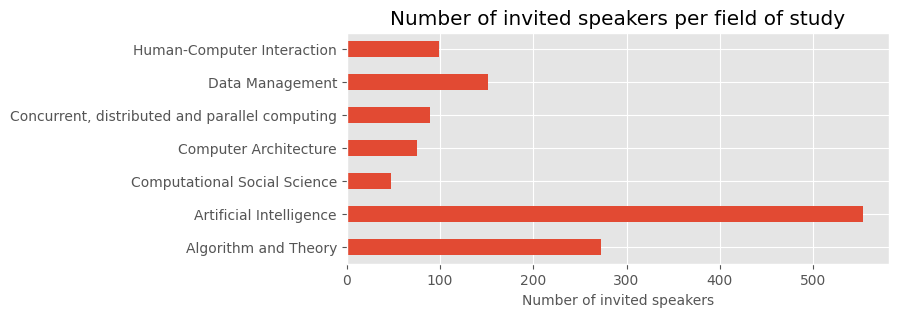

In [6]:
df_invited['Main Topic'].value_counts().sort_index().plot(kind='barh',figsize=(7,3))
plt.xlabel('Number of invited speakers', fontsize=10)
plt.title('Number of invited speakers per field of study')
plt.show()

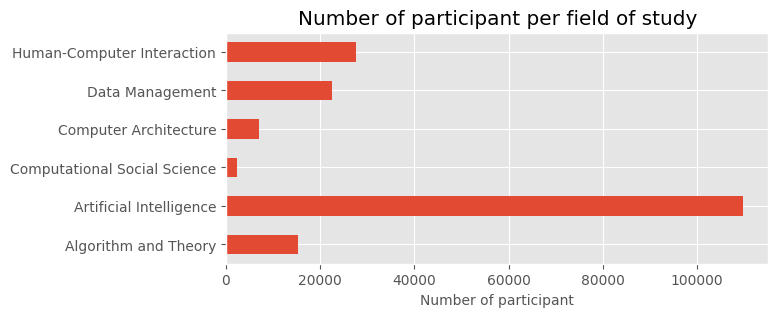

In [7]:
df_proceedings['Main Topic'].value_counts().sort_index().plot(kind='barh',figsize=(7,3))
plt.xlabel('Number of participant', fontsize=10)
plt.title('Number of participant per field of study')
plt.show()

### Distribution of Gender per Conference/Field

Text(0.5, 1.0, 'Ratio of gender per conference')

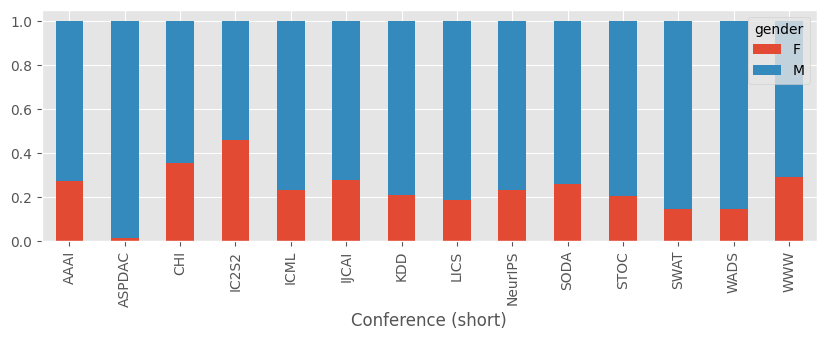

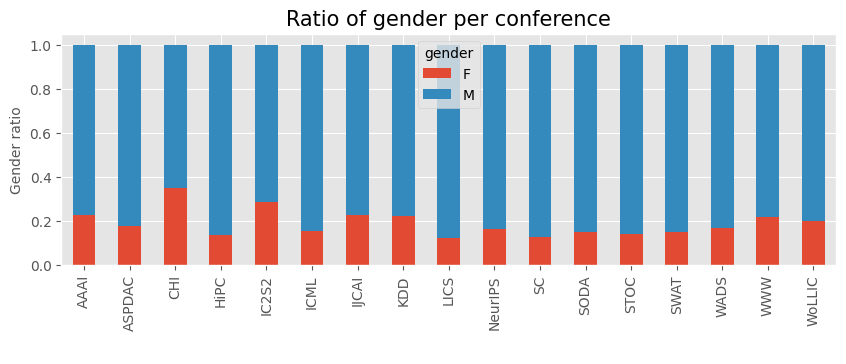

In [3]:
df_invited.groupby('Conference (short)')['gender'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10,3))
df_proceedings.groupby('Conference (short)')['gender'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10,3))
plt.xlabel(" ")
plt.ylabel("Gender ratio", fontsize=10)
plt.title("Ratio of gender per conference", fontsize=15)

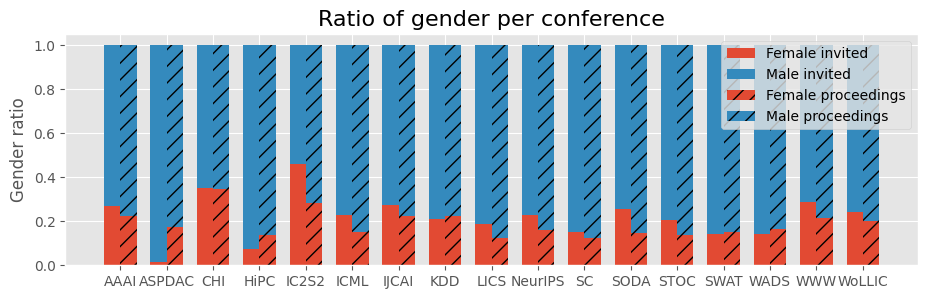

In [22]:
# Combine the two dataframes by conference name
df_combined = pd.merge(
    df_invited.groupby('Conference (short)')['gender'].value_counts(normalize=True).unstack(),
    df_proceedings.groupby('Conference (short)')['gender'].value_counts(normalize=True).unstack(),
    on='Conference (short)',
    suffixes=['_invited', '_proceedings']
)

# Create a grouped bar chart with two bars for each conference
labels = df_combined.index
female_invited_values = df_combined['F_invited']
male_invited_values = df_combined['M_invited']
female_proceedings_values = df_combined['F_proceedings']
male_proceedings_values = df_combined['M_proceedings']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(11,3))
rects1 = ax.bar(x - width/2, female_invited_values, width, label='Female invited')
rects2 = ax.bar(x - width/2, male_invited_values, width, label='Male invited', bottom=female_invited_values)
rects3 = ax.bar(x + width/2, female_proceedings_values, width, label='Female proceedings',hatch="//",color=rects1[0].get_facecolor())
rects4 = ax.bar(x + width/2, male_proceedings_values, width, label='Male proceedings', bottom=female_proceedings_values,hatch="//",color = rects2[0].get_facecolor())

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('')
ax.set_ylabel('Gender ratio')
ax.set_title('Ratio of gender per conference', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
# ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [32]:
female_invited_values

Main Topic
Algorithm and Theory                              0.201465
Artificial Intelligence                           0.245487
Computational Social Science                      0.458333
Computer Architecture                             0.013333
Concurrent, distributed and parallel computing    0.089888
Data Management                                   0.250000
Human-Computer Interaction                        0.353535
Name: F_invited, dtype: float64

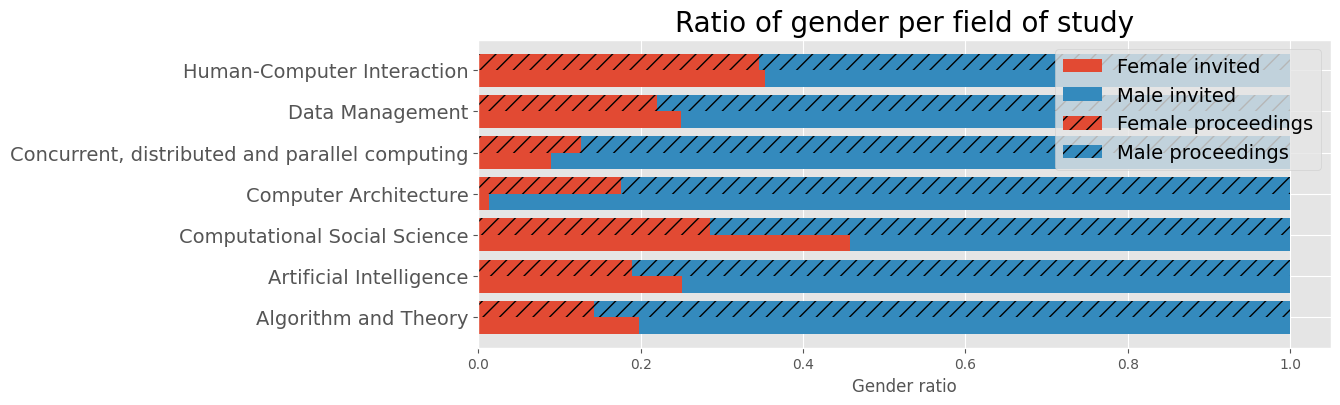

In [2]:
# Combine the two dataframes by conference name
df_combined = pd.merge(
    df_invited.groupby('Main Topic')['gender'].value_counts(normalize=True).unstack(),
    df_proceedings.groupby('Main Topic')['gender'].value_counts(normalize=True).unstack(),
    on='Main Topic',
    suffixes=['_invited', '_proceedings']
)

# Create a grouped bar chart with two bars for each conference
labels = df_combined.index
female_invited_values = df_combined['F_invited']
male_invited_values = df_combined['M_invited']
female_proceedings_values = df_combined['F_proceedings']
male_proceedings_values = df_combined['M_proceedings']

fig, ax = plt.subplots(figsize=(11, 4))
width = 0.4
y = np.arange(len(labels))

rects1 = ax.barh(y, female_invited_values, height=width, label='Female invited')
rects2 = ax.barh(y, male_invited_values, height=width, left=female_invited_values, label='Male invited')
rects3 = ax.barh(y + width, female_proceedings_values, height=width, label='Female proceedings', color=rects1[0].get_facecolor(),hatch = "//")
rects4 = ax.barh(y + width, male_proceedings_values, height=width, left=female_proceedings_values, label='Male proceedings', hatch = "//", color = rects2[0].get_facecolor())

# Legend outside the plot
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.legend(fontsize=14 )

# Axes labels and title
plt.ylabel("")
plt.xlabel("Gender ratio")
plt.title("Ratio of gender per field of study", fontsize=20)
ax.set_yticks(y + width/2)
ax.set_yticklabels(df_combined.index, fontsize=14)

# Invert y-axis to show conference names from top to bottom
# plt.gca().invert_yaxis()

plt.show()

### Evolution of Gender Representation

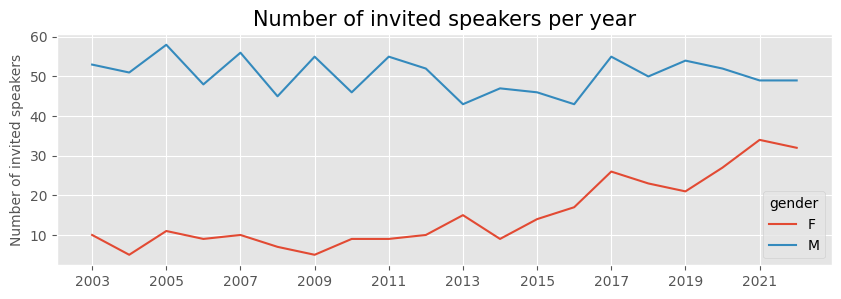

In [13]:
df_invited.groupby(['Year','gender']).size().unstack().plot(kind='line',figsize=(10,3))
plt.title('Number of invited speakers per year', fontsize=15)
plt.ylabel('Number of invited speakers', fontsize=10)
plt.xlabel("")
plt.xticks(np.arange(2003, 2023, 2))
plt.show()

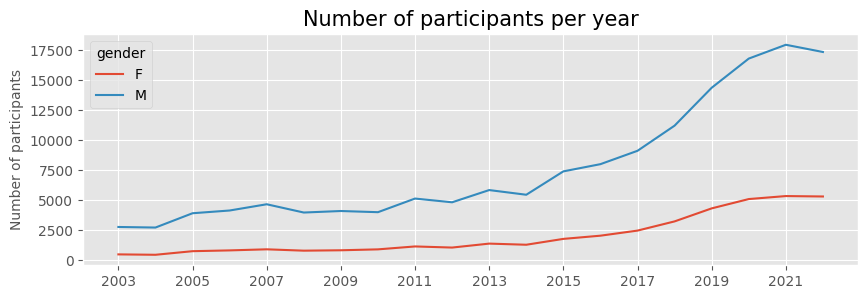

In [12]:
df_proceedings.groupby(['Year','gender']).size().unstack().plot(kind='line',figsize=(10,3))
plt.title('Number of participants per year', fontsize=15)
plt.ylabel('Number of participants', fontsize=10)
plt.xlabel("")
plt.xticks(np.arange(2003, 2023, 2))
plt.show()

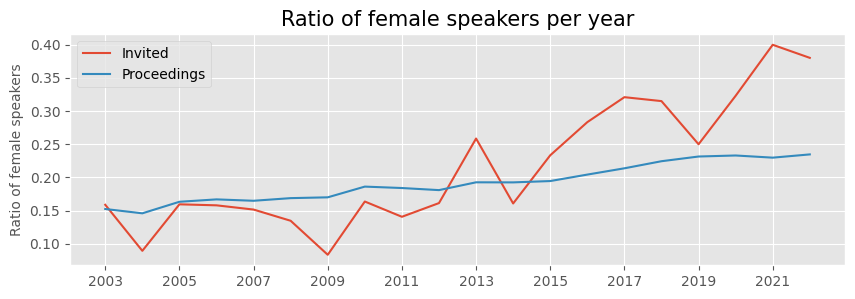

In [172]:
df_invited_new.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Invited")
df_proceedings.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Proceedings")
plt.title('Ratio of female speakers per year' , fontsize=15)
plt.ylabel('Ratio of female speakers', fontsize=10)
plt.xlabel("")
plt.xticks(np.arange(2003, 2023, 2))
plt.legend()
plt.show()

In [51]:
df_invited['Main Topic'].unique()

array(['Artificial Intelligence', 'Computer Architecture',
       'Human-Computer Interaction',
       'Concurrent, distributed and parallel computing',
       'Computational Social Science', 'Data Management',
       'Algorithm and Theory'], dtype=object)

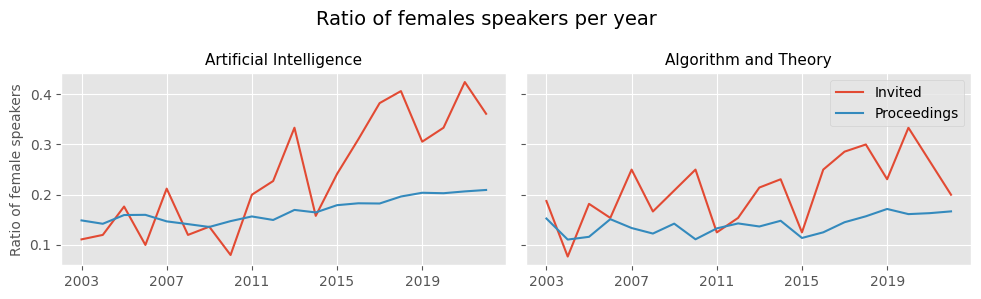

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

conference = df_invited['Main Topic'].unique()[0]
df1 = df_invited[df_invited['Main Topic'] == conference]
df2 = df_proceedings[df_proceedings['Main Topic'] == conference]
df1.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Invited",ax=ax1)
df2.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Proceedings",ax=ax1)
ax1.set_title(conference, fontsize=11)

conference2 = df_invited['Main Topic'].unique()[6]
df3 = df_invited[df_invited['Main Topic'] == conference2]
df4 = df_proceedings[df_proceedings['Main Topic'] == conference2]
df3.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Invited",ax=ax2)
df4.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(10,3),label = "Proceedings",ax=ax2)
ax2.set_title(conference2, fontsize=11)

# General Plot
fig.suptitle('Ratio of females speakers per year', fontsize=14)
ax1.set_ylabel('Ratio of female speakers', fontsize=10)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax1.set_xticks(np.arange(2003, 2023, 4))
ax2.set_xticks(np.arange(2003, 2023, 4))
plt.tight_layout()
plt.legend()
plt.show()

In [178]:
df1_1

,Year,gender,ratio
0,2004,M,0.909091
1,2004,F,0.090909
2,2005,M,0.666667
3,2005,F,0.333333
4,2006,M,0.833333
...,...,...,...
31,2020,F,0.333333
32,2021,M,0.625000
33,2021,F,0.375000
34,2022,M,0.583333


In [180]:
df_year = pd.DataFrame({'Year': list(range(2003, 2023))})

In [185]:
df_invited[(df_invited['Conference (short)']=="AAAI") & (df_invited['Year'] == 2008)]

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic,Productivity
37,Alexie A. Efros,2008,AAAI,Alexie,A.,Efros,F,0,0,0,0,AAAI Conference on Artificial Intelligence,Artificial Intelligence,0.000000
38,Chris Urmson,2008,AAAI,Chris,NaN,Urmson,M,19,32,2001,7,AAAI Conference on Artificial Intelligence,Artificial Intelligence,2.714286
39,David Haussler,2008,AAAI,David,NaN,Haussler,M,126,177,1980,28,AAAI Conference on Artificial Intelligence,Artificial Intelligence,4.500000
40,Eric Horvitz,2008,AAAI,Eric,NaN,Horvitz,M,130,327,1985,23,AAAI Conference on Artificial Intelligence,Artificial Intelligence,5.652174
41,Kenneth M. Ford,2008,AAAI,Kenneth,M.,Ford,M,36,41,1988,20,AAAI Conference on Artificial Intelligence,Artificial Intelligence,1.800000
42,Lillian Lee,2008,AAAI,Lillian,NaN,Lee,F,28,65,1993,15,AAAI Conference on Artificial Intelligence,Artificial Intelligence,1.866667
43,Mark Newman,2008,AAAI,Mark,NaN,Newman,M,7,11,1987,21,AAAI Conference on Artificial Intelligence,Artificial Intelligence,0.333333
44,Seth Copen Goldstein,2008,AAAI,Seth,Copen,Goldstein,M,75,103,1991,17,AAAI Conference on Artificial Intelligence,Artificial Intelligence,4.411765
45,Stuart Russell,2008,AAAI,Stuart,NaN,Russell,M,94,182,1986,22,AAAI Conference on Artificial Intelligence,Artificial Intelligence,4.272727


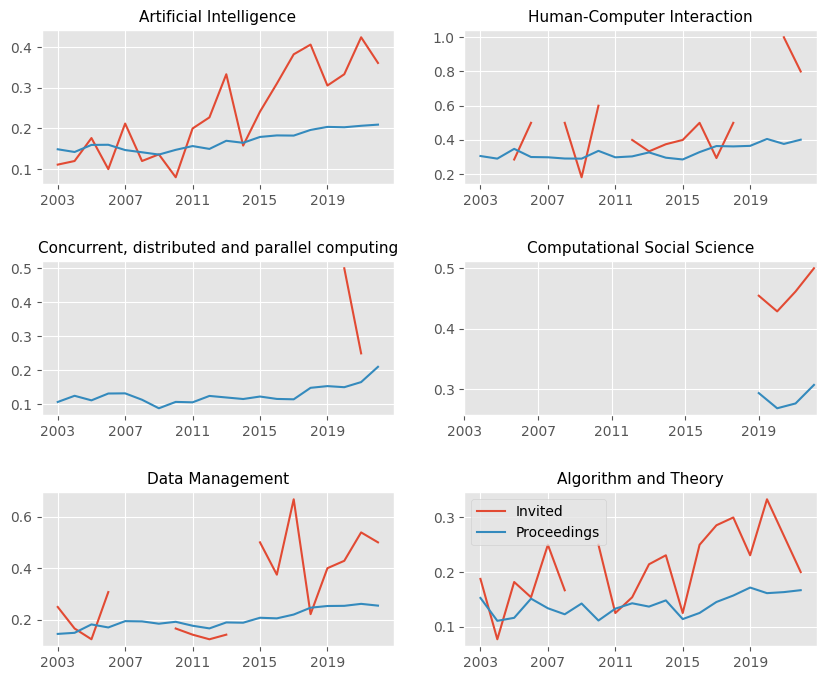

In [202]:
plt.figure(figsize=(10, 17))
plt.subplots_adjust(hspace=0.5)
field = df_invited['Main Topic'].unique()
field = field[field != 'Computer Architecture']

for n, f in enumerate(field):
    ax = plt.subplot(len(field), 2, n + 1)
    
    # Prepare data for the invited
    df_conf_inv = df_invited[df_invited['Main Topic'] == f]
    df_inv_grouped = df_conf_inv.groupby('Year')['gender'].value_counts(normalize=True).reset_index(name='ratio')
    df_inv_filtered = df_inv_grouped[df_inv_grouped['gender'] == "F"]
    df_inv_merged = pd.merge(df_year, df_inv_filtered, on='Year', how='left')
    
    # Prepare data for the proceedings
    df_conf_pro = df_proceedings[df_proceedings['Main Topic'] == f]
    df_pro_grouped = df_conf_pro.groupby('Year')['gender'].value_counts(normalize=True).reset_index(name='ratio')
    df_pro_filtered = df_pro_grouped[df_pro_grouped['gender'] == "F"]
    df_pro_merged = pd.merge(df_year, df_pro_filtered, on='Year', how='left')
    
    # Plot
    ax.plot(range(2003,2023),df_inv_merged['ratio'], label = "Invited")
    ax.plot(range(2003,2023),df_pro_merged['ratio'], label = "Proceedings")
    ax.set_title(f, fontsize=11)
    ax.set_xticks(np.arange(2003, 2023, 4))
plt.legend()
plt.show()

KeyError: 'F'

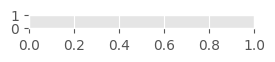

In [45]:
conference = df_invited['Main Topic'].unique()

for n, k in enumerate(conference):
    ax = plt.subplot(len(k), 2, n + 1)
    df1 = df_invited[df_invited['Conference (short)'] == k]
    df2 = df_proceedings[df_proceedings['Conference (short)'] == k]

    df1.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(5,3),label = "Invited", ax =ax)
    df2.groupby('Year')['gender'].value_counts(normalize=True).loc[:,"F"].plot(kind='line', figsize=(5,3),label = "Proceedings", ax=ax)
    plt.title('Ratio of female speakers per year' , fontsize=12)
    plt.ylabel('Ratio of female speakers', fontsize=10)
    plt.xlabel("")
    plt.xticks(np.arange(2003, 2023, 5))
    plt.legend(fontsize=9)
    plt.show()

In [23]:
df_invited[df_invited['Conference (short)'] == 'IJCAI']['Year'].unique()

array([2003, 2005, 2007, 2009, 2011, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [83]:
df1.groupby('Year')['gender'].value_counts(normalize=True)

Year  gender
2003  M         0.923077
      F         0.076923
2005  M         0.875000
      F         0.125000
2015  M         0.875000
                  ...   
2020  F         0.375000
2021  M         0.625000
      F         0.375000
2022  M         0.750000
      F         0.250000
Name: gender, Length: 20, dtype: float64

### Top ten speaker

In [44]:
df_proceedings

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,column_equal,Paper Count,Max Paper Count,First year paper,ID,Age,Productivity,Conference (long),Main Topic
0,Aaron Gage,2004,AAAI,Aaron,NaN,Gage,M,True,7,8,1999,Aaron Gage_1,5,1.400000,AAAI Conference on Artificial Intelligence,Artificial Intelligence
1,Abhi Shelat,2004,AAAI,Abhi,NaN,Shelat,M,True,7,75,2002,Abhi Shelat_1,2,3.500000,AAAI Conference on Artificial Intelligence,Artificial Intelligence
2,Adele E. Howe,2004,AAAI,Adele,E.,Howe,F,True,48,91,1986,Adele E. Howe_1,18,2.666667,AAAI Conference on Artificial Intelligence,Artificial Intelligence
3,Akihiro Kishimoto,2004,AAAI,Akihiro,NaN,Kishimoto,M,True,4,62,2002,Akihiro Kishimoto_1,2,2.000000,AAAI Conference on Artificial Intelligence,Artificial Intelligence
4,Al Globus,2004,AAAI,Al,NaN,Globus,M,True,6,6,1990,Al Globus_1,14,0.428571,AAAI Conference on Artificial Intelligence,Artificial Intelligence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194633,Tiziano Dalmonte,2022,WoLLIC,Tiziano,NaN,Dalmonte,M,True,15,15,2018,Tiziano Dalmonte_1,4,3.750000,"Workshop on Logic, Language, Information and C...",Artificial Intelligence
194634,Tomas Svoboda,2022,WoLLIC,Tomas,NaN,Svoboda,M,True,47,49,1997,Tomas Svoboda_1,25,1.880000,"Workshop on Logic, Language, Information and C...",Artificial Intelligence
194635,Tomoyuki Yamakami,2022,WoLLIC,Tomoyuki,NaN,Yamakami,M,True,98,98,1992,Tomoyuki Yamakami_1,30,3.266667,"Workshop on Logic, Language, Information and C...",Artificial Intelligence
194636,Valentin Cassano,2022,WoLLIC,Valentin,NaN,Cassano,M,True,13,13,2013,Valentin Cassano_1,9,1.444444,"Workshop on Logic, Language, Information and C...",Artificial Intelligence


In [58]:
df_proceedings[df_proceedings['Full name']=="Le Song"]

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,column_equal,Paper Count,Max Paper Count,First year paper,ID,Age,Productivity,Conference (long),Main Topic
10258,Le Song,2016,AAAI,Le,NaN,Song,F,True,100,222,2004,Le Song_1,12,8.333333,AAAI Conference on Artificial Intelligence,Artificial Intelligence
14087,Le Song,2018,AAAI,Le,NaN,Song,F,True,148,222,2004,Le Song_1,14,10.571429,AAAI Conference on Artificial Intelligence,Artificial Intelligence
14088,Le Song,2018,AAAI,Le,NaN,Song,F,True,148,222,2004,Le Song_1,14,10.571429,AAAI Conference on Artificial Intelligence,Artificial Intelligence
14089,Le Song,2018,AAAI,Le,NaN,Song,F,True,148,222,2004,Le Song_1,14,10.571429,AAAI Conference on Artificial Intelligence,Artificial Intelligence
16891,Le Song,2019,AAAI,Le,NaN,Song,F,True,167,222,2004,Le Song_1,15,11.133333,AAAI Conference on Artificial Intelligence,Artificial Intelligence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153828,Le Song,2021,NeurIPS,Le,NaN,Song,F,False,209,222,2004,Le Song_5,17,12.294118,Conference on Neural Information Processing Sy...,Artificial Intelligence
153829,Le Song,2021,NeurIPS,Le,NaN,Song,F,False,209,222,2004,Le Song_6,17,12.294118,Conference on Neural Information Processing Sy...,Artificial Intelligence
153830,Le Song,2021,NeurIPS,Le,NaN,Song,F,False,209,222,2004,Le Song_7,17,12.294118,Conference on Neural Information Processing Sy...,Artificial Intelligence
160217,Le Song,2022,NeurIPS,Le,NaN,Song,F,False,222,222,2004,Le Song_11,18,12.333333,Conference on Neural Information Processing Sy...,Artificial Intelligence


In [ ]:
Hui Xiong

In [56]:
df_proceedings[df_proceedings['gender']=="F"]['ID'].value_counts().head(15)

Hui Xiong_2             111
Le Song_1                91
Ping Li_2                84
Doina Precup_1           83
Ariel D. Procaccia_1     78
Xing Xie_2               75
Sarit Kraus_1            70
Edith Elkind_1           68
Carla P. Gomes_1         67
Xia Hu_1                 59
Lijun Zhang_2            57
Tommi S. Jaakkola_1      55
Joelle Pineau_1          54
Yun Fu_1                 53
Yiran Chen_1             50
Name: ID, dtype: int64

In [12]:
df_invited['Full name'].value_counts().head(15)

Tim Berners-Lee           9
Prabhakar Raghavan        7
Daphne Koller             7
Cynthia Dwork             6
Lise Getoor               5
Jon Kleinberg             4
Oren Etzioni              4
David Haussler            4
Christos Papadimitriou    4
Michael Kearns            4
Josh Tenenbaum            4
Susan Athey               4
Yann LeCun                4
Stuart Russell            3
Geoffrey E. Hinton        3
Name: Full name, dtype: int64

### Age Plot

In [2]:
def map_age_group(age_range):
    if age_range >=  20:
        return '>20'
    elif age_range >= 15:
        return '15-20'
    elif age_range >= 10:
        return '10-15'
    elif age_range >= 5:
        return '5-10'
    else:
        return '0-5'
    
df_invited['Age Group'] = df_invited['Age'].apply(map_age_group)
df_proceedings['Age Group'] = df_proceedings['Age'].apply(map_age_group)

In [10]:
df_test = df_invited[df_invited['Paper Count'] != 0]

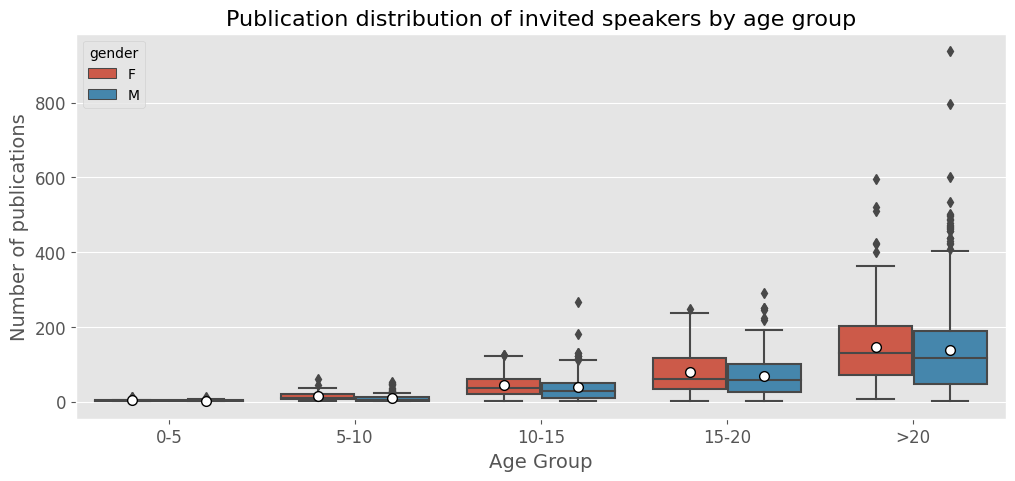

In [11]:
age_order = ['0-5', '5-10', '10-15', '15-20', '>20']
hue_order = ['F', 'M']

plt.figure(figsize=(12, 5))
sns.boxplot(x="Age Group", 
            y="Paper Count",
            hue='gender',
            data=df_test, 
            order=age_order,
            hue_order=hue_order, 
            showfliers=True, 
            showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"}, )
plt.title('Publication distribution of invited speakers by age group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of publications', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

It was also interesting to study how two variables interacted with each other. Figure ** shows the number of publications across the five different age groups for both gender. The result was not suppriceing. I saw how the number of publications rose along with higher seniority. An interesting findings was that females actaully had a higher number of publications on average compared to the males for four out of five of the age groups. 

In [51]:
df_invited[(df_invited['Paper Count'] != 0) & (df_invited['Age Group'] == "0-5")].sort_values(by=['Paper Count'], ascending=True).head(11)

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic,Productivity,Age Group
16,Jeff Hawkins,2005,AAAI,Jeff,NaN,Hawkins,M,1,7,2005,0,AAAI Conference on Artificial Intelligence,Artificial Intelligence,0.000000,0-5
465,Duncan Watts,2010,ICML,Duncan,NaN,Watts,M,1,2,2010,0,International Conference on Machine Learning,Artificial Intelligence,0.000000,0-5
625,Gian Fulgoni,2005,KDD,Gian,NaN,Fulgoni,M,1,1,2005,0,Conference on Knowledge Discovery and Data Mining,Data Management,0.000000,0-5
629,Michael Cavaretta,2006,KDD,Michael,NaN,Cavaretta,M,1,2,2006,0,Conference on Knowledge Discovery and Data Mining,Data Management,0.000000,0-5
642,Konrad Feldman,2010,KDD,Konrad,NaN,Feldman,M,1,1,2010,0,Conference on Knowledge Discovery and Data Mining,Data Management,0.000000,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Richard Sutton,2011,NeurIPS,Richard,NaN,Sutton,M,1,3,2011,0,Conference on Neural Information Processing Sy...,Artificial Intelligence,0.000000,0-5
865,Drew Purves,2016,NeurIPS,Drew,NaN,Purves,M,1,2,2013,3,Conference on Neural Information Processing Sy...,Artificial Intelligence,0.333333,0-5
915,Donna Cox,2003,SC,Donna,NaN,Cox,F,1,1,2001,2,Supercomputing Conference,"Concurrent, distributed and parallel computing",0.500000,0-5
916,Tom West,2004,SC,Tom,NaN,West,M,1,88,2004,0,Supercomputing Conference,"Concurrent, distributed and parallel computing",0.000000,0-5


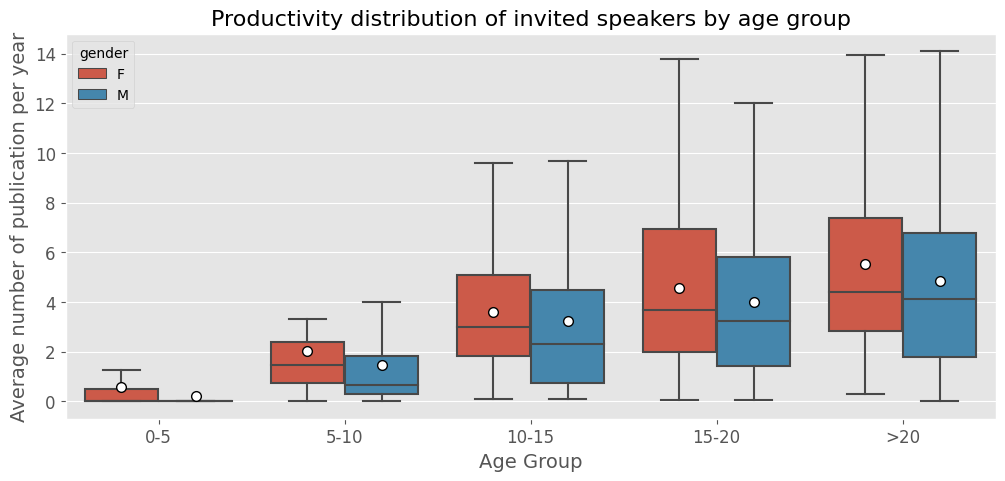

In [14]:
age_order = ['0-5', '5-10', '10-15', '15-20', '>20']
hue_order = ['F', 'M']

plt.figure(figsize=(12, 5))
sns.boxplot(x="Age Group", 
            y="Productivity",
            hue='gender',
            data=df_invited, 
            order=age_order,
            hue_order=hue_order, 
            showfliers=False, 
            showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"}, )
plt.title('Productivity distribution of invited speakers by age group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average number of publication per year', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The next plot looked at the productivity variable across the five age groups with respect to the females and males. I was not suprised when I sae, how it was mostly speaker with a very high academic seniority who were most productive. 

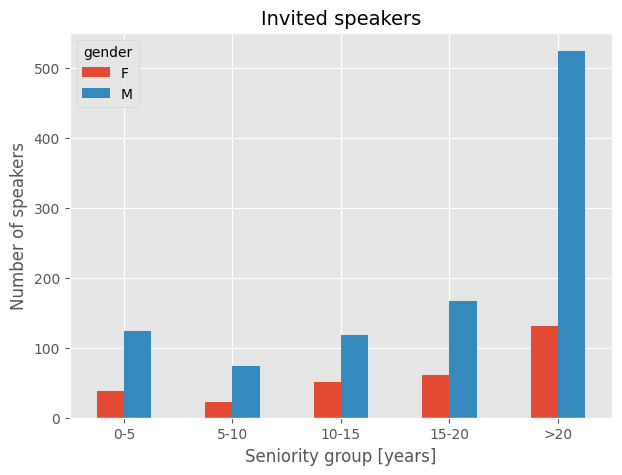

In [43]:
order = ['0-5', '5-10', '10-15', '15-20', '>20']
counts = df_invited.groupby('Age Group')['gender'].value_counts().unstack()
counts = counts.reindex(index=order)
counts.plot(kind='bar', figsize=(7,5), rot=0)
plt.title('Invited speakers', fontsize=14)
plt.ylabel('Number of speakers', fontsize=12)
plt.xlabel('Seniority group [years]', fontsize=12)
# plt.tight_layout()
plt.show()

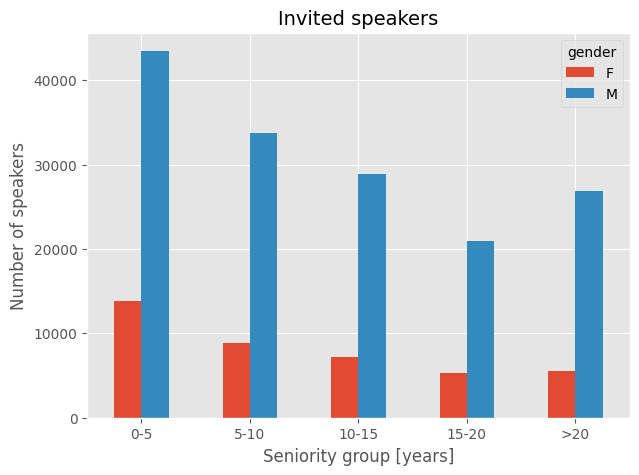

In [42]:
order = ['0-5', '5-10', '10-15', '15-20', '>20']
counts = df_proceedings.groupby('Age Group')['gender'].value_counts().unstack()
counts = counts.reindex(index=order)
counts.plot(kind='bar', figsize=(7,5), rot=0)
plt.title('Invited speakers', fontsize=14)
plt.ylabel('Number of speakers', fontsize=12)
plt.xlabel('Seniority group [years]', fontsize=12)
# plt.tight_layout()
plt.show()